<a href="https://colab.research.google.com/github/Evans-Sense/pet/blob/main/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Итак, приступим к выполнению ДЗ №1. В качестве датасета я выбрал стоимость недвижимости в России за 2018-2021 годы.**

# Первый этап: загружаем датасет и проводим небольшой EDA.

In [1]:
import pandas as pd

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrdaniilak/russia-real-estate-20182021")

print("Path to dataset files:", path)

100%|██████████| 111M/111M [00:03<00:00, 30.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mrdaniilak/russia-real-estate-20182021/versions/3


In [3]:
import os
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/root/.cache/kagglehub/datasets/mrdaniilak/russia-real-estate-20182021/versions/3/all_v2.csv


In [4]:
db = pd.read_csv('/root/.cache/kagglehub/datasets/mrdaniilak/russia-real-estate-20182021/versions/3/all_v2.csv')

db.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


In [5]:
db.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   price          5477006 non-null  int64  
 1   date           5477006 non-null  object 
 2   time           5477006 non-null  object 
 3   geo_lat        5477006 non-null  float64
 4   geo_lon        5477006 non-null  float64
 5   region         5477006 non-null  int64  
 6   building_type  5477006 non-null  int64  
 7   level          5477006 non-null  int64  
 8   levels         5477006 non-null  int64  
 9   rooms          5477006 non-null  int64  
 10  area           5477006 non-null  float64
 11  kitchen_area   5477006 non-null  float64
 12  object_type    5477006 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
db.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000
mean,4422029.023,54.038,53.244,4307.141,1.949,6.215,11.399,1.726,53.918,10.628,3.945
std,21507519.155,4.623,20.748,3308.050,1.039,4.957,6.536,1.082,33.353,9.792,4.558
min,-2144967296.000,41.459,19.890,3.000,0.000,1.000,1.000,-2.000,0.070,0.010,1.000
25%,1950000.000,53.378,37.778,2661.000,1.000,2.000,5.000,1.000,38.000,7.000,1.000
50%,2990000.000,55.171,43.068,2922.000,2.000,5.000,10.000,2.000,48.020,9.700,1.000
75%,4802000.000,56.226,65.649,6171.000,3.000,9.000,16.000,2.000,63.130,12.700,11.000
max,2147483647.000,71.980,162.536,61888.000,5.000,39.000,39.000,10.000,7856.000,9999.000,11.000


In [7]:
db.shape

(5477006, 13)

Как мы видим в данных нет пропусков, однако не везде в них корректные значения. Например, есть отрицательные цены. Исправим этот недостаток в ходе обработки, а заодно уберем некоторые столбцы

#1. Preprocessing


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'geo_lat'}>,
        <Axes: title={'center': 'geo_lon'}>],
       [<Axes: title={'center': 'region'}>,
        <Axes: title={'center': 'building_type'}>,
        <Axes: title={'center': 'level'}>],
       [<Axes: title={'center': 'levels'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'object_type'}>, <Axes: >]], dtype=object)

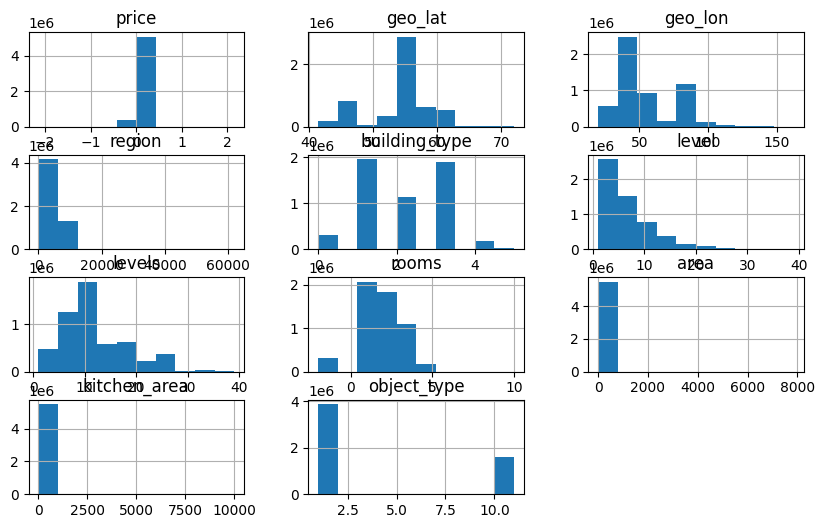

In [9]:
db.hist(figsize=(10, 6))

In [10]:
db.isna().sum()

,0
price,0
date,0
time,0
geo_lat,0
geo_lon,0
region,0
building_type,0
level,0
levels,0
rooms,0


Проверим на наличие дубликатов данных и уберем их

In [11]:
db.duplicated().sum()

np.int64(1523)

In [12]:
db = db.drop_duplicates()
db.shape

(5475483, 13)

Уберем столбец со временем, исправим ошибки парсинга.

In [13]:
db.drop('time', axis=1, inplace=True)
db.object_type = db.object_type.apply(lambda x: 2 if x == 11 else x)
db.rooms = db.rooms.apply(lambda x : 0 if x < 0 else x)
db.price = db.price.abs()

Вместо этажа и высоты дома сделаем один столбец с соотношением этажа к высоте

In [14]:
db.loc[db.level > db.levels, 'level'] = db.levels
db['level_to_levels'] = db.level / db.levels

db.drop('level', axis=1, inplace=True)
db.drop("levels", axis=1, inplace=True)

От даты оставим год и месяц

In [15]:
db.date = pd.to_datetime(db.date)
db['year'] = db['date'].dt.year
db['month'] = db['date'].dt.month
db.drop('date', axis=1, inplace=True)

In [16]:
db.head()

,price,geo_lat,geo_lon,region,building_type,rooms,area,kitchen_area,object_type,level_to_levels,year,month
0,6050000,59.806,30.376,2661,1,3,82.600,10.800,1,0.800,2018,2
1,8650000,55.684,37.297,81,3,2,69.100,12.000,1,0.208,2018,2
2,4000000,56.295,44.062,2871,1,3,66.000,10.000,1,0.556,2018,2
3,1850000,44.996,39.075,2843,4,2,38.000,5.000,2,0.750,2018,3
4,5450000,55.919,37.985,81,3,2,60.000,10.000,1,0.929,2018,3


Для удобства заменим коды регионов на названия

In [17]:
region_name = {
    '2661': 'Санкт-Петербург',
    '3446': 'Ленинградская область',
    '3': 'Москва',
    '81': 'Московская область',
    '2843': 'Краснодарский край',
    '2871': 'Нижегородская область',
    '3230': 'Ростовская область',
    '3106': 'Самарская область',
    '2922': 'Республика Татарстан',
    '2900': 'Ставропольский край',
    '2722': 'Республика Башкортостан',
    '6171': 'Свердловская область',
    '4417': 'Республика Коми',
    '5282': 'Челябинская область',
    '5368': 'Иркутская область',
    '5520': 'Пермский край',
    '6817': 'Алтайский край',
    '9579': 'Республика Бурятия',
    '2604': 'Ярославская область',
    '1010': 'Удмуртская Республика',
    '7793': 'Псковская область',
    '13919': 'Республика Северная Осетия — Алания',
    '2860': 'Кемеровская область',
    '3019': 'Чувашская Республика',
    '4982': 'Республика Марий Эл',
    '9648': 'Кабардино-Балкарская Республика',
    '5241': 'Республика Мордовия',
    '3870': 'Красноярский край',
    '3991': 'Тюменская область',
    '2359': 'Республика Хакасия',
    '9654': 'Новосибирская область',
    '2072': 'Воронежская область',
    '8090': 'Республика Карелия',
    '4007': 'Республика Дагестан',
    '11171': 'Республика Саха (Якутия)',
    '10160': 'Забайкальский край',
    '7873, 6937': 'Республика Крым',
    '2594': 'Кировская область',
    '8509': 'Республика Калмыкия',
    '11416': 'Республика Адыгея',
    '11991': 'Карачаево-Черкесская Республика',
    '5178': 'Республика Тыва',
    '13913': 'Республика Ингушетия',
    '6309': 'Республика Алтай',
    '5952': 'Белгородская область',
    '6543': 'Архангельская область',
    '2880': 'Тверская область',
    '5993': 'Пензенская область',
    '2484': 'Ханты-Мансийский автономный округ',
    '4240': 'Липецкая область',
    '5789': 'Владимирская область',
    '14880': 'Ямало-Ненецкий автономный округ',
    '1491': 'Рязанская область',
    '2885': 'Чеченская Республика',
    '5794': 'Смоленская область',
    '2528': 'Саратовская область',
    '4374': 'Вологодская область',
    '4695': 'Волгоградская область',
    '2328': 'Калужская область',
    '5143': 'Тульская область',
    '2806': 'Тамбовская область',
    '14368': 'Мурманская область',
    '5736': 'Новгородская область',
    '7121': 'Курская область',
    '4086': 'Хабаровский край',
    '821': 'Брянская область',
    '10582': 'Астраханская область',
    '7896': 'Калининградская область',
    '8640': 'Омская область',
    '5703': 'Курганская область',
    '10201': 'Томская область',
    '4249': 'Ульяновская область',
    '3153': 'Оренбургская область',
    '4189': 'Костромская область',
    '2814': 'Орловская область',
    '13098': 'Камчатский край',
    '8894': 'Ивановская область',
    '7929': 'Амурская область',
    '16705': 'Магаданская область',
    '69': 'Еврейская автономная область',
    '4963': 'Приморский край',
    '1901': 'Сахалинская область',
    '61888': 'Ненецкий автономный округ'
}

In [18]:
db['region'] = db.region.astype(str)
db['region_name'] = db['region'].map(region_name)
db.drop('region', axis=1, inplace=True)
db.head()

,price,geo_lat,geo_lon,building_type,rooms,area,kitchen_area,object_type,level_to_levels,year,month,region_name
0,6050000,59.806,30.376,1,3,82.600,10.800,1,0.800,2018,2,Санкт-Петербург
1,8650000,55.684,37.297,3,2,69.100,12.000,1,0.208,2018,2,Московская область
2,4000000,56.295,44.062,1,3,66.000,10.000,1,0.556,2018,2,Нижегородская область
3,1850000,44.996,39.075,4,2,38.000,5.000,2,0.750,2018,3,Краснодарский край
4,5450000,55.919,37.985,3,2,60.000,10.000,1,0.929,2018,3,Московская область


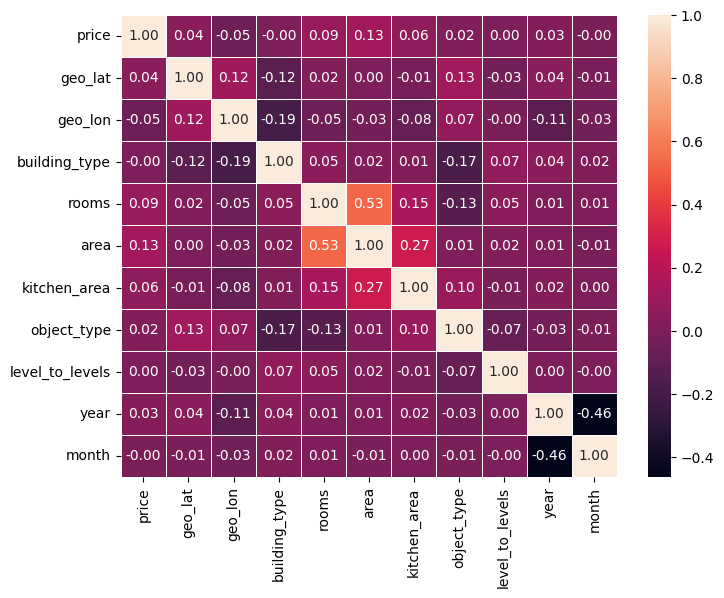

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(db.corr(numeric_only=True), annot=True, cbar=True, linewidths=.5, fmt= '.2f')
plt.show()

И закодируем их LabelEncoder

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
db['enc_reg'] = encoder.fit_transform(db[['region_name']])
db.drop('region_name', axis=1, inplace=True)
db.head()

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,price,geo_lat,geo_lon,building_type,rooms,area,kitchen_area,object_type,level_to_levels,year,month,enc_reg
0,6050000,59.806,30.376,1,3,82.600,10.800,1,0.800,2018,2,62
1,8650000,55.684,37.297,3,2,69.100,12.000,1,0.208,2018,2,30
2,4000000,56.295,44.062,1,3,66.000,10.000,1,0.556,2018,2,33
3,1850000,44.996,39.075,4,2,38.000,5.000,2,0.750,2018,3,22
4,5450000,55.919,37.985,3,2,60.000,10.000,1,0.929,2018,3,30


Разобьем данные на трейн и тест

In [21]:
from sklearn.model_selection import train_test_split
X = db.drop('price', axis=1)
Y = db['price']
feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4380386, 11), (1095097, 11), (4380386,), (1095097,))

И обучим скэллер

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Переходим к обучению моделей

Обучим CatBoostRegressor без подбора гиперпараметров

In [33]:
!pip install catboost
from sklearn.metrics import *
from catboost import CatBoostRegressor
import numpy as np

CBModel = CatBoostRegressor(iterations=1000, verbose=100)
CBModel.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)])

y_test_pred = CBModel.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("Relative MAE (% от среднего y_test):",
      mean_absolute_error(y_test, y_test_pred) / np.mean(y_test) * 100, "%")

evals_result = CBModel.get_evals_result()
train_loss = evals_result['learn']['RMSE']
test_loss = evals_result['validation_1']['RMSE']

Learning rate set to 0.189939
0:	learn: 21335003.7519557	test: 21335003.7519557	test1: 20869524.2982812	best: 20869524.2982812 (0)	total: 1.41s	remaining: 23m 24s
100:	learn: 17111542.0166527	test: 17111542.0166527	test1: 15841108.1930132	best: 15841108.1930132 (100)	total: 1m 12s	remaining: 10m 47s
200:	learn: 15867268.5264639	test: 15867268.5264639	test1: 14569168.8546195	best: 14569168.8546195 (200)	total: 2m 23s	remaining: 9m 29s
300:	learn: 15182980.0777359	test: 15182980.0777359	test1: 13979485.4528389	best: 13979485.4528389 (300)	total: 3m 30s	remaining: 8m 8s
400:	learn: 14835424.5408485	test: 14835424.5408485	test1: 13836523.4696288	best: 13835370.1189094 (390)	total: 4m 38s	remaining: 6m 55s
500:	learn: 14420199.5674654	test: 14420199.5674654	test1: 13455776.9466788	best: 13455776.9466788 (500)	total: 5m 47s	remaining: 5m 45s
600:	learn: 14186898.4774649	test: 14186898.4774649	test1: 13276297.6946335	best: 13274080.6080321 (598)	total: 6m 56s	remaining: 4m 36s
700:	learn: 139

Визуализируем процесс обучения

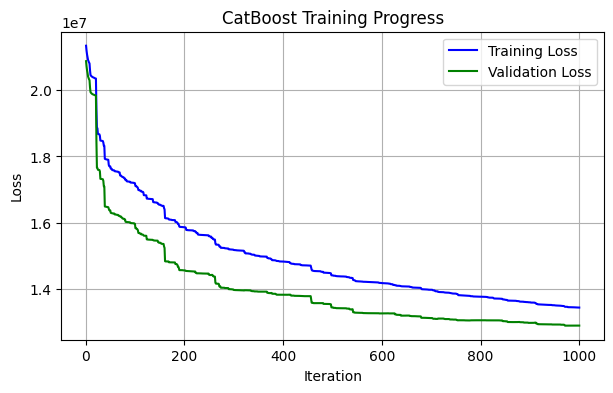

In [34]:
iterations = np.arange(1, len(train_loss) + 1)

plt.figure(figsize=(7, 4))
plt.plot(iterations, train_loss, label='Training Loss', color='blue')
plt.plot(iterations, test_loss, label='Validation Loss', color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('CatBoost Training Progress')
plt.legend()
plt.grid()
plt.show()

Посмотрим на важность признаков для модели

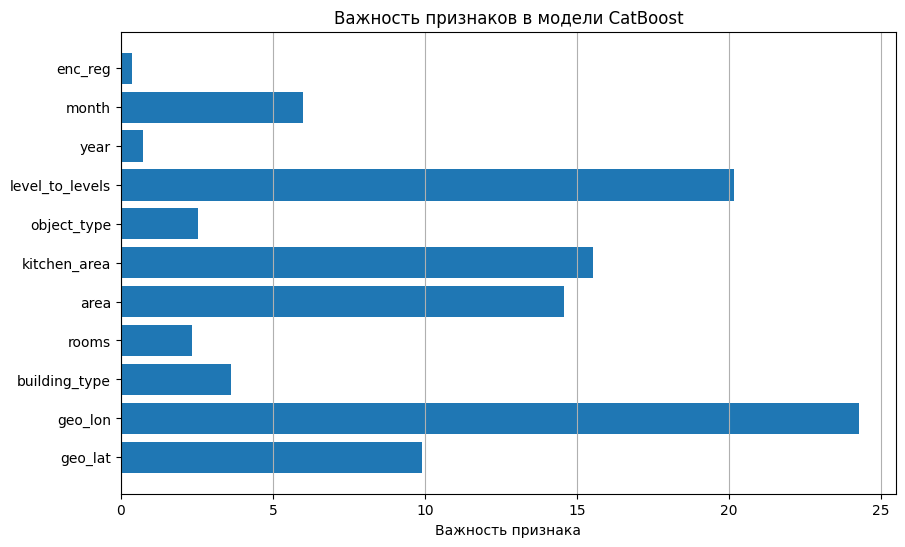

In [35]:
feature_importance = CBModel.get_feature_importance()
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Важность признака')
plt.title('Важность признаков в модели CatBoost')
plt.grid(axis='x')
plt.show()

Аналогично проверим LightGBM

In [27]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import lightgbm as lgb

evals_result = {}
LGBMReg = LGBMRegressor(n_estimators=1000)
LGBMReg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            eval_metric='rmse',
            callbacks=[lgb.record_evaluation(evals_result)])

y_test_pred = LGBMReg.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("Relative MAE (% от среднего y_test):",
      mean_absolute_error(y_test, y_test_pred) / np.mean(y_test) * 100, "%")

train_loss = evals_result['training']['rmse']
test_loss = evals_result['valid_1']['rmse']

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.155960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 4380386, number of used features: 11
[LightGBM] [Info] Start training from score 4655931.455416


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Mean Squared Error (MSE): 140844780920881.72
Mean Absolute Error (MAE): 1048772.368111387
Relative MAE (% от среднего y_test): 22.589256708803852 %


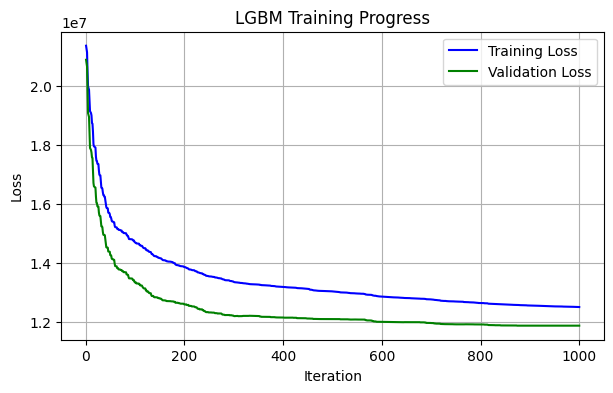

In [28]:
iterations = np.arange(1, len(train_loss) + 1)

plt.figure(figsize=(7, 4))
plt.plot(iterations, train_loss, label='Training Loss', color='blue')
plt.plot(iterations, test_loss, label='Validation Loss', color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('LGBM Training Progress')
plt.legend()
plt.grid()
plt.show()

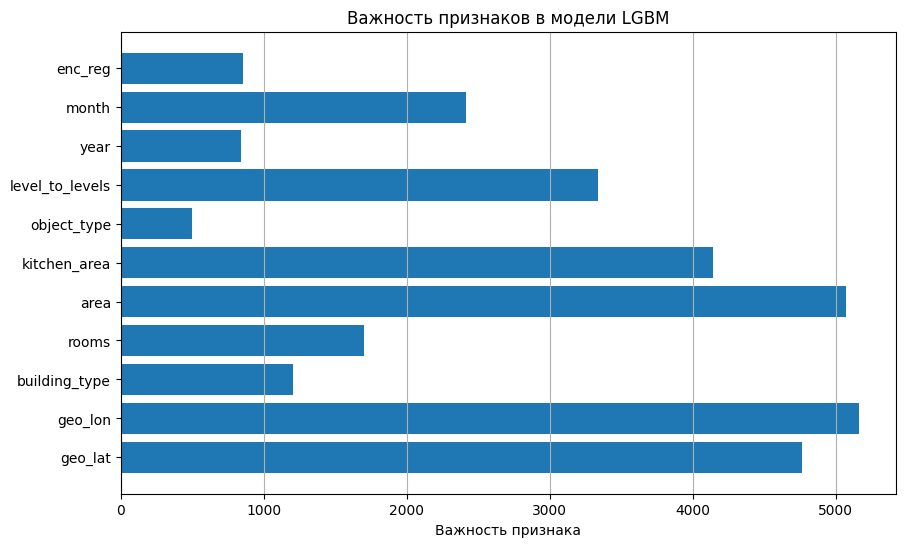

In [29]:
feature_importance = LGBMReg.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Важность признака')
plt.title('Важность признаков в модели LGBM')
plt.grid(axis='x')
plt.show()

XGBoost

In [30]:
import xgboost as xgb

evals_result = {}

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

XGBReg = xgb.train(params, dtrain,
                   num_boost_round=1000,
                   evals=[(dtrain, 'training'), (dtest, 'validation')],
                   evals_result=evals_result,
                   verbose_eval=100)

y_test_pred = XGBReg.predict(dtest)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("Relative MAE (% от среднего y_test):",
      mean_absolute_error(y_test, y_test_pred) / np.mean(y_test) * 100, "%")

train_loss = evals_result['training']['rmse']
test_loss = evals_result['validation']['rmse']

[0]	training-rmse:21052435.67950	validation-rmse:20521633.30588
[100]	training-rmse:14782978.71376	validation-rmse:13842502.86129
[200]	training-rmse:13956638.41614	validation-rmse:13162931.97070
[300]	training-rmse:13517433.89590	validation-rmse:12889060.10881
[400]	training-rmse:13091902.72762	validation-rmse:12704499.81573
[500]	training-rmse:12782223.38360	validation-rmse:12625698.17351
[600]	training-rmse:12507480.82878	validation-rmse:12543306.71024
[700]	training-rmse:12278793.25281	validation-rmse:12517387.47303
[800]	training-rmse:12157899.73825	validation-rmse:12501889.72484
[900]	training-rmse:12023223.45613	validation-rmse:12503771.09764
[999]	training-rmse:11931204.24980	validation-rmse:12502935.59362
Mean Squared Error (MSE): 156323387801600.0
Mean Absolute Error (MAE): 1328716.75
Relative MAE (% от среднего y_test): 28.618911664394442 %


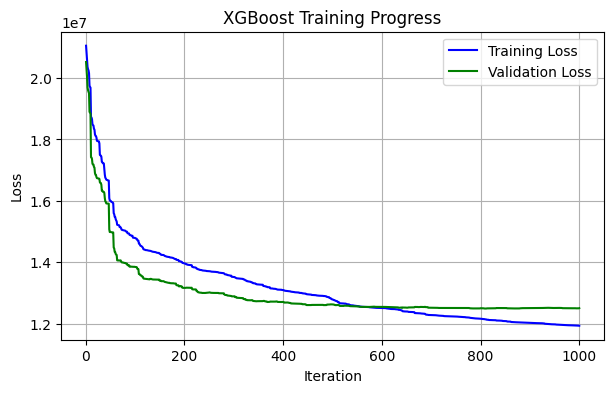

In [31]:
iterations = np.arange(1, len(train_loss) + 1)

plt.figure(figsize=(7, 4))
plt.plot(iterations, train_loss, label='Training Loss', color='blue')
plt.plot(iterations, test_loss, label='Validation Loss', color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('XGBoost Training Progress')
plt.legend()
plt.grid()
plt.show()

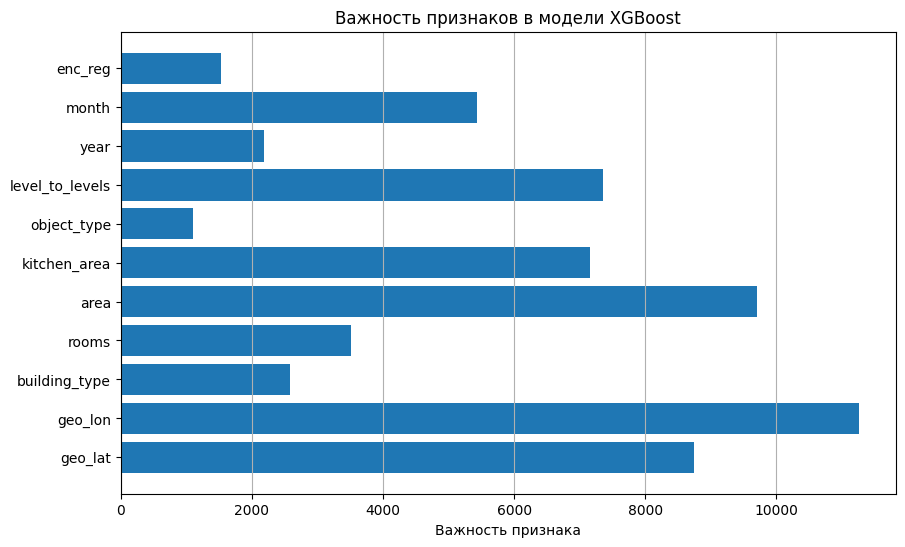

In [32]:
feature_importance = XGBReg.get_score(importance_type='weight')

feature_importance_list = list(feature_importance.items())
importance_scores = [item[1] for item in feature_importance_list]

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Важность признака')
plt.title('Важность признаков в модели XGBoost')
plt.grid(axis='x')
plt.show()

SKlearn boosting.
Здесь пришлось ограничить число итераций до 100 так как стандартный бустинг в этой библиотеке очень долго учится на таком размере данных

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

GBReg = GradientBoostingRegressor(random_state=42, verbose = 10)

GBReg.fit(X_train, y_train)

y_test_pred = GBReg.predict(X_test)

print("Mean Squared Error (MSE):".ljust(30), mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):".ljust(30), mean_absolute_error(y_test, y_test_pred))
print("Relative MAE (% от среднего y_test):".ljust(30),
      mean_absolute_error(y_test, y_test_pred) / np.mean(y_test) * 100, "%")

train_losses = [mean_squared_error(y_train, y_pred) for y_pred in GBReg.staged_predict(X_train)]
test_losses = [mean_squared_error(y_test, y_pred) for y_pred in GBReg.staged_predict(X_test)]

      Iter       Train Loss   Remaining Time 
         1 460219040986662.8125           21.77m
         2 456484217059852.9375           21.67m
         3 453322865993605.3750           21.38m
         4 450755584115635.2500           21.18m
         5 448583560300123.3125           20.83m
         6 446748802539999.3750           20.61m
         7 445000058286357.5625           20.76m
         8 443600294171057.3750           20.46m
         9 442432545343257.1250           20.26m
        10 441328676238944.4375           20.03m
        11 440249374271432.3125           19.88m
        12 439438050522307.8750           19.71m
        13 438715692942879.1250           19.46m
        14 437954416087295.5625           19.95m
        15 437349820217999.9375           19.84m
        16 436803627947831.0625           19.57m
        17 436244329792651.9375           19.27m
        18 435757088279562.5625           18.99m
        19 435203697855231.5625           18.69m
        20 434796587109

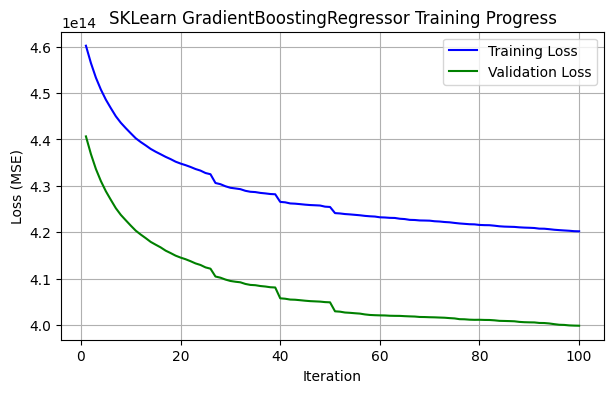

In [37]:
iterations = np.arange(1, len(train_losses) + 1)

plt.figure(figsize=(7, 4))
plt.plot(iterations, train_losses, label='Training Loss', color='blue')
plt.plot(iterations, test_losses, label='Validation Loss', color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE)')
plt.title('SKLearn GradientBoostingRegressor Training Progress')
plt.legend()
plt.grid()
plt.show()

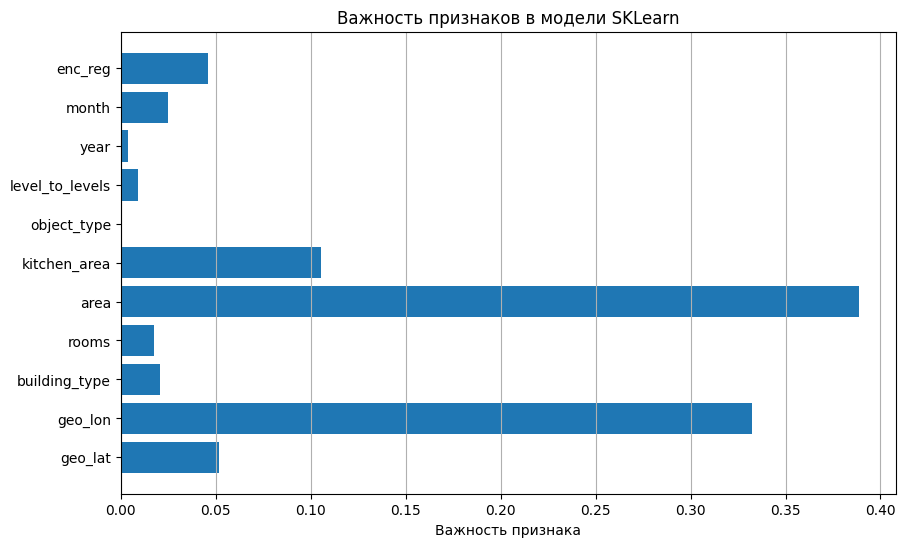

In [38]:
feature_importance = GBReg.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Важность признака')
plt.title('Важность признаков в модели SKLearn')
plt.grid(axis='x')
plt.show()

Из коробки лучший результат как по скорости обучения так и по качеству показывает LightGBM, проверим, получится ли улучшить значения после подбора гиперпараметров

#Подбор гиперпараметров

Для стандартного бустинга SKLearn сделаем подбор параметров с помощью GridSearchCV. В остальных моделях используем Optuna для более тонкой настройки.

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train_subset_for_grid, _, y_train_subset_for_grid, _ = train_test_split(
    X_train, y_train, test_size=0.9, random_state=42
)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7]
}

gbr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

print("Starting GridSearchCV for GradientBoostingRegressor...")

grid_search.fit(X_train_subset_for_grid, y_train_subset_for_grid)

print("\nGridSearchCV completed.")
print("Best parameters found: ", grid_search.best_params_)
print("Best MAE score (negative): ", grid_search.best_score_)

best_GBReg = grid_search.best_estimator_
best_GBReg.fit(X_train, y_train)

y_test_pred = best_GBReg.predict(X_test)

print("\nEvaluation of the best GradientBoostingRegressor on the test set:")
print("Mean Squared Error (MSE):".ljust(30), mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):".ljust(30), mean_absolute_error(y_test, y_test_pred))
print("Relative MAE (% от среднего y_test):".ljust(30),
      mean_absolute_error(y_test, y_test_pred) / np.mean(y_test) * 100, "%")

Starting GridSearchCV for GradientBoostingRegressor...
Fitting 3 folds for each of 12 candidates, totalling 36 fits

GridSearchCV completed.
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best MAE score (negative):  -1247537.5939619755

Evaluation of the best GradientBoostingRegressor on the test set:
Mean Squared Error (MSE):      164049953078215.84
Mean Absolute Error (MAE):     1165005.0302471411
Relative MAE (% от среднего y_test): 25.092764164535524 %


In [39]:
!pip install optuna
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import optuna
from sklearn.model_selection import KFold

# Уменьшим размеры выборки для подбора до 10% от исходного датасета для увеличения скорости
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', -1, 20),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'random_state': 42,
        'n_jobs': -1
    }

    model = LGBMRegressor(**params)

    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    mse_scores = []

    for fold, (train_index, val_index) in enumerate(kf.split(X_train_subset)):
        X_train_fold, X_val_fold = X_train_subset[train_index], X_train_subset[val_index]
        y_train_fold, y_val_fold = y_train_subset.iloc[train_index], y_train_subset.iloc[val_index]

        model.fit(X_train_fold, y_train_fold,
                  eval_set=[(X_val_fold, y_val_fold)])

        y_pred_fold = model.predict(X_val_fold)
        mse = mean_squared_error(y_val_fold, y_pred_fold)
        mse_scores.append(mse)

    return np.mean(mse_scores)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("Best parameters found: ", study.best_params)

best_LGBMReg = LGBMRegressor(**study.best_params, random_state=42, n_jobs=-1)
best_LGBMReg.fit(X_train, y_train)

y_test_pred = best_LGBMReg.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("Relative MAE (% от среднего y_test):",
      mean_absolute_error(y_test, y_test_pred) / np.mean(y_test) * 100, "%")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 14.1 MB/s eta 0:00:00


[I 2025-11-16 07:41:28,675] A new study created in memory with name: no-name-6b9782ed-eb67-4e37-82ae-3b75be9f2873


  0%|          | 0/50 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 07:42:11,891] Trial 0 finished with value: 476924689235775.3 and parameters: {'n_estimators': 736, 'max_depth': 2, 'min_child_samples': 53, 'subsample': 0.8468952044111988}. Best is trial 0 with value: 476924689235775.3.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 07:42:59,307] Trial 1 finished with value: 287518628946592.06 and parameters: {'n_estimators': 515, 'max_depth': 9, 'min_child_samples': 45, 'subsample': 0.807295949788421}. Best is trial 1 with value: 287518628946592.06.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048933 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 07:43:31,165] Trial 2 finished with value: 262527988050803.16 and parameters: {'n_estimators': 337, 'max_depth': 19, 'min_child_samples': 26, 'subsample': 0.8221426898359401}. Best is trial 2 with value: 262527988050803.16.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 07:43:48,467] Trial 3 finished with value: 480457324701529.25 and parameters: {'n_estimators': 289, 'max_depth': 2, 'min_child_samples': 30, 'subsample': 0.9690303173665018}. Best is trial 2 with value: 262527988050803.16.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 07:44:13,535] Trial 4 finished with value: 342421552809699.2 and parameters: {'n_estimators': 232, 'max_depth': 20, 'min_child_samples': 98, 'subsample': 0.9185720719681134}. Best is trial 2 with value: 262527988050803.16.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 07:45:11,130] Trial 5 finished with value: 277017104126344.62 and parameters: {'n_estimators': 641, 'max_depth': 13, 'min_child_samples': 50, 'subsample': 0.8529846050380894}. Best is trial 2 with value: 262527988050803.16.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 07:46:07,810] Trial 6 finished with value: 299946946335139.0 and parameters: {'n_estimators': 583, 'max_depth': 19, 'min_child_samples': 79, 'subsample': 0.8989573664477821}. Best is trial 2 with value: 262527988050803.16.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 07:47:18,977] Trial 7 finished with value: 283238669427664.5 and parameters: {'n_estimators': 754, 'max_depth': 11, 'min_child_samples': 68, 'subsample': 0.8039070388806566}. Best is trial 2 with value: 262527988050803.16.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 07:48:07,766] Trial 8 finished with value: 312078718453157.5 and parameters: {'n_estimators': 499, 'max_depth': 14, 'min_child_samples': 95, 'subsample': 0.9369780514847798}. Best is trial 2 with value: 262527988050803.16.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 07:48:30,589] Trial 9 finished with value: 321648529514329.3 and parameters: {'n_estimators': 208, 'max_depth': 8, 'min_child_samples': 49, 'subsample': 0.9311310722675623}. Best is trial 2 with value: 262527988050803.16.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 07:49:50,073] Trial 10 finished with value: 223153563855161.78 and parameters: {'n_estimators': 969, 'max_depth': 16, 'min_child_samples': 20, 'subsample': 0.8606737422743375}. Best is trial 10 with value: 223153563855161.78.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 07:51:08,878] Trial 11 finished with value: 223892221538719.28 and parameters: {'n_estimators': 952, 'max_depth': 16, 'min_child_samples': 20, 'subsample': 0.8625622407924378}. Best is trial 10 with value: 223153563855161.78.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 07:52:29,876] Trial 12 finished with value: 226095668478469.12 and parameters: {'n_estimators': 1000, 'max_depth': 16, 'min_child_samples': 21, 'subsample': 0.8795042590471973}. Best is trial 10 with value: 223153563855161.78.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 07:53:51,785] Trial 13 finished with value: 249026147948612.9 and parameters: {'n_estimators': 967, 'max_depth': 16, 'min_child_samples': 36, 'subsample': 0.8732124131980048}. Best is trial 10 with value: 223153563855161.78.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034879 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 07:55:25,035] Trial 14 finished with value: 288417936446591.75 and parameters: {'n_estimators': 859, 'max_depth': 6, 'min_child_samples': 37, 'subsample': 0.8396098540628482}. Best is trial 10 with value: 223153563855161.78.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066928 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 07:56:35,126] Trial 15 finished with value: 226377338336384.4 and parameters: {'n_estimators': 871, 'max_depth': 16, 'min_child_samples': 20, 'subsample': 0.8774938471733892}. Best is trial 10 with value: 223153563855161.78.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 07:57:57,936] Trial 16 finished with value: 285237647259587.94 and parameters: {'n_estimators': 845, 'max_depth': 12, 'min_child_samples': 66, 'subsample': 0.9920383133968491}. Best is trial 10 with value: 223153563855161.78.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 07:58:38,957] Trial 17 finished with value: 309665977156297.0 and parameters: {'n_estimators': 415, 'max_depth': 6, 'min_child_samples': 36, 'subsample': 0.8926304627904889}. Best is trial 10 with value: 223153563855161.78.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067946 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 07:59:47,849] Trial 18 finished with value: 298473558230906.94 and parameters: {'n_estimators': 715, 'max_depth': -1, 'min_child_samples': 81, 'subsample': 0.8557244650853817}. Best is trial 10 with value: 223153563855161.78.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:01:03,402] Trial 19 finished with value: 241265370268389.34 and parameters: {'n_estimators': 890, 'max_depth': 17, 'min_child_samples': 30, 'subsample': 0.8283987566832152}. Best is trial 10 with value: 223153563855161.78.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:02:23,845] Trial 20 finished with value: 256016243098027.75 and parameters: {'n_estimators': 923, 'max_depth': 14, 'min_child_samples': 41, 'subsample': 0.9130414565269148}. Best is trial 10 with value: 223153563855161.78.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:03:44,665] Trial 21 finished with value: 224900213233221.0 and parameters: {'n_estimators': 998, 'max_depth': 17, 'min_child_samples': 20, 'subsample': 0.8804352854633424}. Best is trial 10 with value: 223153563855161.78.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:04:49,981] Trial 22 finished with value: 230029159160838.9 and parameters: {'n_estimators': 797, 'max_depth': 18, 'min_child_samples': 20, 'subsample': 0.8651466097808458}. Best is trial 10 with value: 223153563855161.78.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:05:03,552] Trial 23 finished with value: 300963570130880.06 and parameters: {'n_estimators': 121, 'max_depth': 15, 'min_child_samples': 28, 'subsample': 0.8911646793246084}. Best is trial 10 with value: 223153563855161.78.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:06:25,893] Trial 24 finished with value: 234621888808800.66 and parameters: {'n_estimators': 994, 'max_depth': 11, 'min_child_samples': 26, 'subsample': 0.832306626073716}. Best is trial 10 with value: 223153563855161.78.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:07:44,965] Trial 25 finished with value: 245699809389233.38 and parameters: {'n_estimators': 922, 'max_depth': 20, 'min_child_samples': 33, 'subsample': 0.8625424304127066}. Best is trial 10 with value: 223153563855161.78.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:08:47,097] Trial 26 finished with value: 286679515945726.06 and parameters: {'n_estimators': 669, 'max_depth': 17, 'min_child_samples': 59, 'subsample': 0.8826112065074718}. Best is trial 10 with value: 223153563855161.78.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:09:56,835] Trial 27 finished with value: 260506337861720.0 and parameters: {'n_estimators': 793, 'max_depth': 14, 'min_child_samples': 43, 'subsample': 0.9112362118679342}. Best is trial 10 with value: 223153563855161.78.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:11:18,789] Trial 28 finished with value: 229888890498512.4 and parameters: {'n_estimators': 958, 'max_depth': 18, 'min_child_samples': 23, 'subsample': 0.9516633871572933}. Best is trial 10 with value: 223153563855161.78.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:12:36,224] Trial 29 finished with value: 277902149998539.25 and parameters: {'n_estimators': 820, 'max_depth': 12, 'min_child_samples': 57, 'subsample': 0.8457638056201737}. Best is trial 10 with value: 223153563855161.78.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053473 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:13:38,505] Trial 30 finished with value: 240333617057425.4 and parameters: {'n_estimators': 742, 'max_depth': 15, 'min_child_samples': 26, 'subsample': 0.867007078918021}. Best is trial 10 with value: 223153563855161.78.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:14:59,423] Trial 31 finished with value: 222940675145111.4 and parameters: {'n_estimators': 993, 'max_depth': 16, 'min_child_samples': 20, 'subsample': 0.8872787739491235}. Best is trial 31 with value: 222940675145111.4.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:16:20,611] Trial 32 finished with value: 243801092358894.16 and parameters: {'n_estimators': 934, 'max_depth': 18, 'min_child_samples': 32, 'subsample': 0.9019475659632432}. Best is trial 31 with value: 222940675145111.4.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:17:38,999] Trial 33 finished with value: 238382546622083.66 and parameters: {'n_estimators': 896, 'max_depth': 9, 'min_child_samples': 20, 'subsample': 0.8133562388603661}. Best is trial 31 with value: 222940675145111.4.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:19:01,359] Trial 34 finished with value: 233849460745970.84 and parameters: {'n_estimators': 990, 'max_depth': 17, 'min_child_samples': 25, 'subsample': 0.8430372697188546}. Best is trial 31 with value: 222940675145111.4.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:20:22,699] Trial 35 finished with value: 250363191661577.9 and parameters: {'n_estimators': 935, 'max_depth': 19, 'min_child_samples': 39, 'subsample': 0.8582655661212346}. Best is trial 31 with value: 222940675145111.4.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018939 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:21:31,498] Trial 36 finished with value: 244372693180642.0 and parameters: {'n_estimators': 817, 'max_depth': 15, 'min_child_samples': 31, 'subsample': 0.8843527673981693}. Best is trial 31 with value: 222940675145111.4.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:22:54,440] Trial 37 finished with value: 263449908926827.16 and parameters: {'n_estimators': 897, 'max_depth': 20, 'min_child_samples': 47, 'subsample': 0.9050796667812236}. Best is trial 31 with value: 222940675145111.4.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067963 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:23:40,764] Trial 38 finished with value: 244899915972346.53 and parameters: {'n_estimators': 561, 'max_depth': 13, 'min_child_samples': 25, 'subsample': 0.9227822812908706}. Best is trial 31 with value: 222940675145111.4.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:24:20,353] Trial 39 finished with value: 264362642706464.25 and parameters: {'n_estimators': 454, 'max_depth': 13, 'min_child_samples': 29, 'subsample': 0.8910887188091968}. Best is trial 31 with value: 222940675145111.4.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:25:18,294] Trial 40 finished with value: 283617622664350.94 and parameters: {'n_estimators': 613, 'max_depth': 10, 'min_child_samples': 53, 'subsample': 0.8169599200574644}. Best is trial 31 with value: 222940675145111.4.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:26:42,121] Trial 41 finished with value: 226477264029826.78 and parameters: {'n_estimators': 991, 'max_depth': 16, 'min_child_samples': 22, 'subsample': 0.8745415730043046}. Best is trial 31 with value: 222940675145111.4.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:28:01,271] Trial 42 finished with value: 230353600208502.75 and parameters: {'n_estimators': 957, 'max_depth': 16, 'min_child_samples': 23, 'subsample': 0.8696349869281044}. Best is trial 31 with value: 222940675145111.4.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:29:24,832] Trial 43 finished with value: 243581456908666.5 and parameters: {'n_estimators': 993, 'max_depth': 18, 'min_child_samples': 34, 'subsample': 0.881974016452591}. Best is trial 31 with value: 222940675145111.4.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069643 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:30:34,860] Trial 44 finished with value: 230913008336655.47 and parameters: {'n_estimators': 859, 'max_depth': 14, 'min_child_samples': 20, 'subsample': 0.854367474910474}. Best is trial 31 with value: 222940675145111.4.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051838 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:32:04,249] Trial 45 finished with value: 234200218841145.22 and parameters: {'n_estimators': 1000, 'max_depth': 19, 'min_child_samples': 27, 'subsample': 0.836032813308639}. Best is trial 31 with value: 222940675145111.4.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:33:41,414] Trial 46 finished with value: 291208531276312.0 and parameters: {'n_estimators': 945, 'max_depth': 17, 'min_child_samples': 91, 'subsample': 0.8483954516419444}. Best is trial 31 with value: 222940675145111.4.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:35:13,749] Trial 47 finished with value: 249697623085806.03 and parameters: {'n_estimators': 904, 'max_depth': 7, 'min_child_samples': 24, 'subsample': 0.8966606342211252}. Best is trial 31 with value: 222940675145111.4.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:35:45,720] Trial 48 finished with value: 400810289039930.94 and parameters: {'n_estimators': 332, 'max_depth': 4, 'min_child_samples': 29, 'subsample': 0.8752289937638331}. Best is trial 31 with value: 222940675145111.4.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[I 2025-11-16 08:36:58,757] Trial 49 finished with value: 286957481659161.94 and parameters: {'n_estimators': 762, 'max_depth': 15, 'min_child_samples': 69, 'subsample': 0.8862795639311406}. Best is trial 31 with value: 222940675145111.4.
Best parameters found:  {'n_estimators': 993, 'max_depth': 16, 'min_child_samples': 20, 'subsample': 0.8872787739491235}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.899718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 4380386, number of used features: 11
[LightGBM] [Info] Start training from score 4655931.455416


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Mean Squared Error (MSE): 140683892897309.05
Mean Absolute Error (MAE): 1046368.7639358894
Relative MAE (% от среднего y_test): 22.537486054467827 %


In [41]:
!pip install optuna
from sklearn.metrics import mean_squared_error, mean_absolute_error
import optuna
from catboost import CatBoostRegressor, Pool
import numpy as np
from sklearn.model_selection import KFold, train_test_split

X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.95, random_state=42)


def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 16),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 20, 100),
        'random_seed': 42,
        'verbose': 0,
        'thread_count': -1,
    }

    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    mse_scores = []

    for fold, (train_index, val_index) in enumerate(kf.split(X_train_subset)):
        X_train_fold, X_val_fold = X_train_subset[train_index], X_train_subset[val_index]
        y_train_fold, y_val_fold = y_train_subset.iloc[train_index], y_train_subset.iloc[val_index]

        CBModel = CatBoostRegressor(**params)
        CBModel.fit(X_train_fold, y_train_fold,
                    eval_set=[(X_val_fold, y_val_fold)],
                    early_stopping_rounds=50,
                    verbose=False)

        y_pred_fold = CBModel.predict(X_val_fold)
        mse = mean_squared_error(y_val_fold, y_pred_fold)
        mse_scores.append(mse)

    return np.mean(mse_scores)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

best_catboost_params = study.best_params

best_CBModel = CatBoostRegressor(**best_catboost_params)
best_CBModel.fit(X_train, y_train,
                 eval_set=[(X_test, y_test)],
                 early_stopping_rounds=50,
                 verbose=False)

y_test_pred = best_CBModel.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("Relative MAE (% от среднего y_test):",
      mean_absolute_error(y_test, y_test_pred) / np.mean(y_test) * 100, "%")

[I 2025-11-16 09:15:10,281] A new study created in memory with name: no-name-2f1950e5-8327-4997-adab-ff7075ec3061


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-11-16 09:16:06,328] Trial 0 finished with value: 383016469239636.8 and parameters: {'iterations': 995, 'depth': 4, 'subsample': 0.6080575661206741, 'min_data_in_leaf': 91}. Best is trial 0 with value: 383016469239636.8.
[I 2025-11-16 09:22:09,069] Trial 1 finished with value: 228205369291807.1 and parameters: {'iterations': 302, 'depth': 15, 'subsample': 0.6746229811087597, 'min_data_in_leaf': 57}. Best is trial 1 with value: 228205369291807.1.
[I 2025-11-16 09:22:40,520] Trial 2 finished with value: 316515334718190.06 and parameters: {'iterations': 833, 'depth': 5, 'subsample': 0.9058721254782319, 'min_data_in_leaf': 65}. Best is trial 1 with value: 228205369291807.1.
[I 2025-11-16 09:23:19,239] Trial 3 finished with value: 380853262647101.0 and parameters: {'iterations': 914, 'depth': 4, 'subsample': 0.716346061111394, 'min_data_in_leaf': 21}. Best is trial 1 with value: 228205369291807.1.
[I 2025-11-16 09:24:48,494] Trial 4 finished with value: 235285525600655.0 and paramete

In [40]:
!pip install optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import optuna
import numpy as np
from sklearn.model_selection import KFold, train_test_split

X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.95, random_state=42)

def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.0, 0.5),
        'random_state': 42,
        'n_jobs': -1,
    }

    model = xgb.XGBRegressor(**params)

    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    mse_scores = []

    for fold, (train_index, val_index) in enumerate(kf.split(X_train_subset)):
        X_train_fold, X_val_fold = X_train_subset[train_index], X_train_subset[val_index]
        y_train_fold, y_val_fold = y_train_subset.iloc[train_index], y_train_subset.iloc[val_index]

        model.fit(X_train_fold, y_train_fold,
                  eval_set=[(X_val_fold, y_val_fold)],
                  verbose=False)

        y_pred_fold = model.predict(X_val_fold)
        mse = mean_squared_error(y_val_fold, y_pred_fold)
        mse_scores.append(mse)

    return np.mean(mse_scores)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("Best parameters found: ", study.best_params)

best_xgboost_params = study.best_params

best_XGBReg = xgb.XGBRegressor(**best_xgboost_params)
best_XGBReg.fit(X_train, y_train,
                eval_set=[(X_test, y_test)],
                verbose=False)

y_test_pred = best_XGBReg.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("Relative MAE (% от среднего y_test):",
      mean_absolute_error(y_test, y_test_pred) / np.mean(y_test) * 100, "%")

[I 2025-11-16 08:41:46,275] A new study created in memory with name: no-name-4b2b10d9-7f93-4eee-bb53-6dfd0146d436


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-11-16 08:42:27,297] Trial 0 finished with value: 460605009952768.0 and parameters: {'n_estimators': 600, 'max_depth': 3, 'learning_rate': 0.03333088376888472, 'subsample': 0.8037324587125356, 'colsample_bytree': 0.664145908184052, 'min_child_weight': 5, 'gamma': 0.43584131681089294}. Best is trial 0 with value: 460605009952768.0.
[I 2025-11-16 08:43:05,784] Trial 1 finished with value: 322876414623744.0 and parameters: {'n_estimators': 607, 'max_depth': 6, 'learning_rate': 0.057087238714345456, 'subsample': 0.8235195958528918, 'colsample_bytree': 0.6052678484676915, 'min_child_weight': 9, 'gamma': 0.38534767573254275}. Best is trial 1 with value: 322876414623744.0.
[I 2025-11-16 08:43:49,712] Trial 2 finished with value: 315649343619072.0 and parameters: {'n_estimators': 686, 'max_depth': 6, 'learning_rate': 0.030048356141722826, 'subsample': 0.9847082011317914, 'colsample_bytree': 0.6236545261200299, 'min_child_weight': 1, 'gamma': 0.2134534608262913}. Best is trial 2 with val

После подбора гиперпараметров показатели моделей сблизились и теперь находятся в районе Relative MAE: 23%. Однако лучшие результаты все еще показывает LightGBM, лишь немного улучшив их по сравнению с результатами из коробки. На данном датасете не удалось достичь точности выше 22%, что может говорить о недостаточности информации для более точных предсказаний (например, состояния квартиры), а также достаточно высоком variance самого датасета.